# Computer Vision Feasibility Analysis
## *Framerate and Camera Requirements 2*
*Matt Schneider 10/10/25*

In [1]:
# helper code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# homemade camera classifier class
from analysis.CameraClassifier import Camera

# auto hot reloading for external packages
%load_ext autoreload
%autoreload 2

### Using a different function for p_max_px
In the previous analysis, we used a pecentage of the drones apparent size to calculate the max inter frame movement we would tolerate. In this analysis, we will be using this function

$$
\text{p max px} = \frac{\lambda}{\text{apparent size}}
$$

Where $\lambda$ is some scaling parameter that we can adjust as needed.

In [2]:
# IMX477 analysis with 6mm lens
p_um = 1.55
f_mm = 6.0
range_m = 150
velocity = 15.0

p_max_lambda = 200
object_size = 0.5
p_blur_max_px = 2.0
p_max_percentage = 0.5

# 60 fps, 30fps
sizes = [1920, 4032]


imx477 = Camera("imx477", sizes, p_um, f_mm, p_max_percentage=p_max_percentage, p_lambda=p_max_lambda)
p_max_function = imx477.get_lambda_p_max
results = imx477.run_fps_analysis(velocity, range_m, object_size, p_blur_max_px, p_max_function, print_results=True)

Analysis for: imx477 at 6.0 mm lens
             FPS  Exposure Time (ms)   HFOV  Apparent Size (px)  p_max_px
Size (px)                                                                
1920       25.48                5.06  27.86                12.9      15.5
4032       27.09                4.76  55.02                12.9      15.5


### Range analysis for p_max_px and FPS from 20-150m

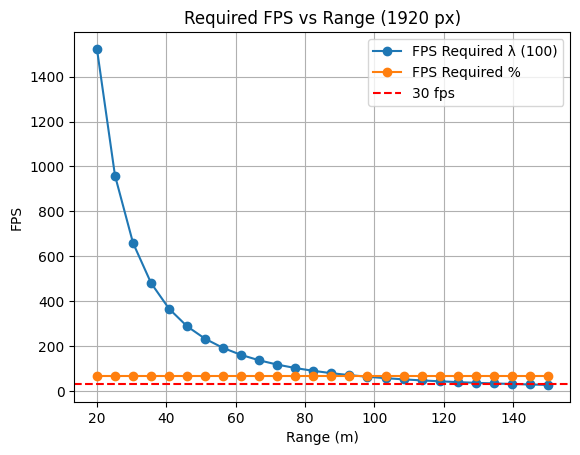

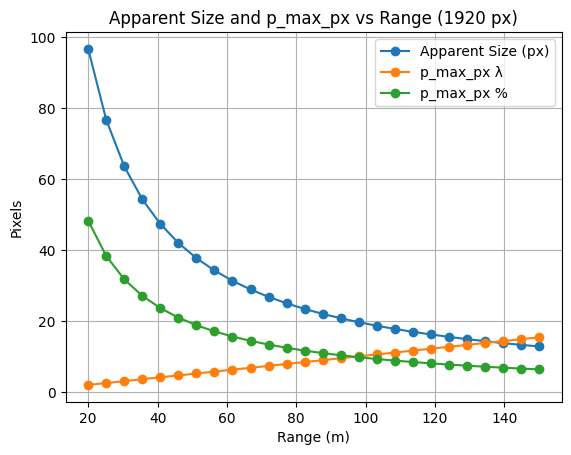

[np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08), np.float64(65.08)]


In [ ]:
ranges = np.linspace(20, 150, 26) # 5m spaces

lambda_fps_values = []
lambda_apparent_size_values = []
lambda_p_max_px_values = []

percent_fps_values = []
percent_apparent_size_values = []
percent_p_max_px_values = []

lambda_p_max = imx477.get_lambda_p_max
percent_p_max = imx477.get_p_max

for r in ranges:
    # lambda relationship
    results_lambda = imx477.run_fps_analysis(velocity, r, object_size, p_blur_max_px, p_max_function=lambda_p_max, print_results=False)
    lambda_row = results_lambda.loc[4032]
    lambda_fps_values.append(lambda_row['FPS'])
    lambda_apparent_size_values.append(lambda_row['Apparent Size (px)'])
    lambda_p_max_px_values.append(lambda_row['p_max_px'])

    # percentage relationship
    results_percent = imx477.run_fps_analysis(velocity, r, object_size, p_blur_max_px, p_max_function=percent_p_max, print_results=False)
    percent_row = results_percent.loc[4032]
    percent_fps_values.append(percent_row['FPS'])
    percent_apparent_size_values.append(percent_row['Apparent Size (px)'])
    percent_p_max_px_values.append(percent_row['p_max_px'])


# fps plot
plt.figure()
plt.plot(ranges, lambda_fps_values, 'o-', label='FPS Required λ (200)')
plt.plot(ranges, percent_fps_values, 'o-', label='FPS Required %')
plt.axhline(y=30, color='r', linestyle='--', label='30 fps')
plt.xlabel('Range (m)')
plt.ylabel('FPS')
plt.title('Required FPS vs Range (1920 px)')
plt.grid(True)
plt.legend()
plt.show()

# size plot
plt.figure()
plt.plot(ranges, lambda_apparent_size_values, 'o-', label='Apparent Size (px)')
plt.plot(ranges, lambda_p_max_px_values, 'o-', label='p_max_px λ')
plt.plot(ranges, percent_p_max_px_values, 'o-', label='p_max_px %')
plt.xlabel('Range (m)')
plt.ylabel('Pixels')
plt.title('Apparent Size and p_max_px vs Range (1920 px)')
plt.grid(True)
plt.legend()
plt.show()

print(percent_fps_values)


#### Results
From initial testing, before ranges were plotted like this, it seemed that the percentage was the wrong relationship since FPS was behaving awkwardly. From this, the correct relationship is a percentage. Although these are both pretty bad relationships and show that we need an even higher FPS than the IMX477 can support. 

### Logistic p_max function
This next code cell implements `p_max_px` as the following logistic function with some chosen values for maximum `p_max_px`

$$
\frac{50}{1+e^{0.05(x-50)}}
$$

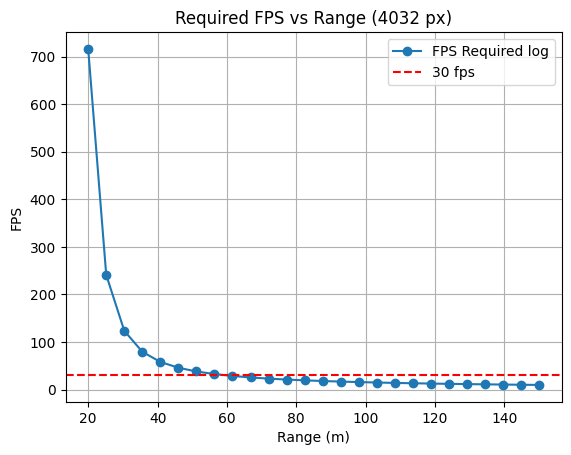

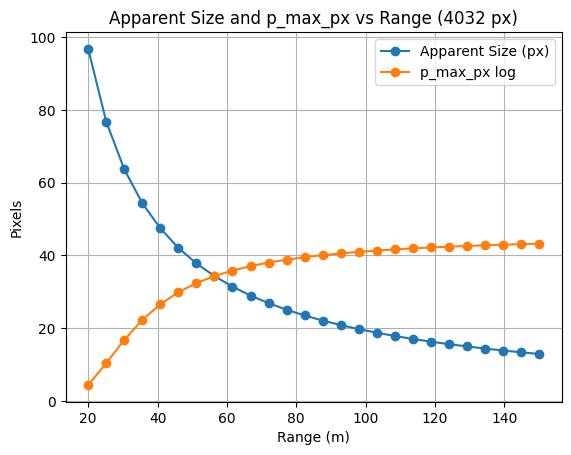

In [10]:
ranges = np.linspace(20, 150, 26) # 5m spaces

log_fps_values = []
log_apparent_size_values = []
log_p_max_px_values = []

log_p_max = imx477.p_max_logistic

for r in ranges:
    # lambda relationship
    results_log = imx477.run_fps_analysis(velocity, r, object_size, p_blur_max_px, p_max_function=log_p_max, print_results=False)
    log_row = results_log.loc[4032]
    log_fps_values.append(log_row['FPS'])
    log_apparent_size_values.append(log_row['Apparent Size (px)'])
    log_p_max_px_values.append(log_row['p_max_px'])


# fps plot
plt.figure()
plt.plot(ranges, log_fps_values, 'o-', label='FPS Required log')
plt.axhline(y=30, color='r', linestyle='--', label='30 fps')
plt.xlabel('Range (m)')
plt.ylabel('FPS')
plt.title('Required FPS vs Range (4032 px)')
plt.grid(True)
plt.legend()
plt.show()

# size plot
plt.figure()
plt.plot(ranges, log_apparent_size_values, 'o-', label='Apparent Size (px)')
plt.plot(ranges, log_p_max_px_values, 'o-', label='p_max_px log')
plt.xlabel('Range (m)')
plt.ylabel('Pixels')
plt.title('Apparent Size and p_max_px vs Range (4032 px)')
plt.grid(True)
plt.legend()
plt.show()

